
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
medical_df = pd.read_csv("C:/Users/Ivanna/Documents/Dataset/medical-charges.csv")

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Як можна підійти до вирішення задачі прогнозування колонки charges
1. Зробити одне фіксоване значення для всіх, за основу можна взяти середнє чи медіану.
2. Поділити клієнтів на курців та некурців і для кожної з цих двох груп прогнозувати одне значення, теж можна взяти медіану чи середнє.
3. Розширити пункт 3 та додати більше ознак - стать та регіон, так вийде 16 груп для прогнозування.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

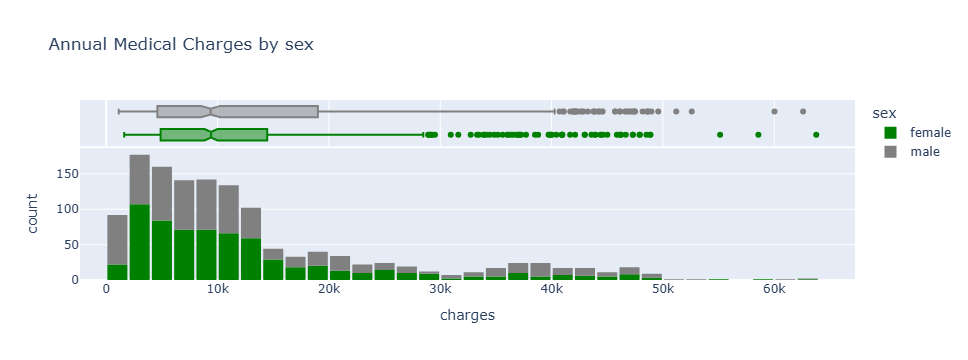

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges by sex'
)
fig.update_layout(bargap=0.1)
fig.show()

1. **Розподіл витрат**: На гістограмі ми бачимо, що витрати зосереджені у двох основних діапазонах: менш як 10000 та між 20000 та 30000. Ці витрати можуть відображати різні рівні медичного покриття або відмінності у стані здоров'я.

2. **Вплив статі**: З гістограм помітно, що чоловіки частіше знаходяться у вищих діапазонах витрат (20k і більше), порівняно з жінками. Натомість, жінки частіше (суттєво, відсотків на 30) мають розмір зборів в діапазоні від 2k до 4k.

3. **Боксплоти (верхня частина графіку)**: Сірий боксплот (чоловіки) показує більш високий  рівень витрат 75го персентиля, а також більшу кількість викидів у вищому діапазоні витрат порівняно з зеленим (жінки), що також свідчить про вищі середні витрати серед чоловіків.

4. **Викиди**: На обох боксплотах присутні викиди (точки поза 'вусами'), що вказує на наявність осіб із значно вищими витратами на медичне страхування, ніж переважна більшість. Це можуть бути люди з серйозними медичними умовами або ті, хто отримав інтенсивне лікування.

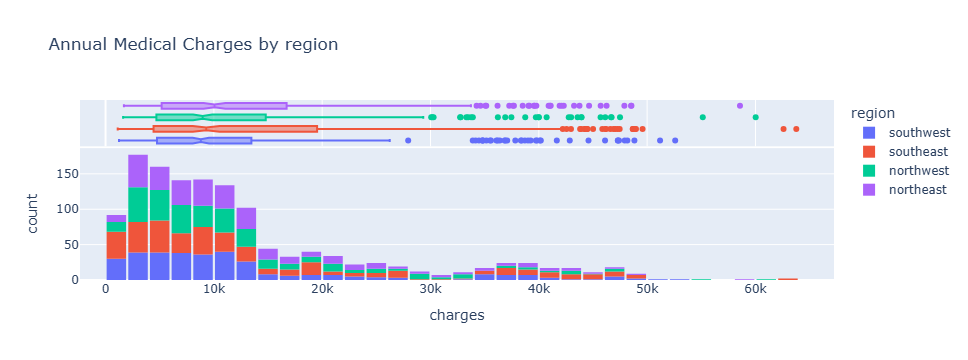

In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges by region'
)
fig.update_layout(bargap=0.1)
fig.show()

1. **Загальна кількість зборів**: Гістограма показує, що у southeast регіоні є найвища кількість клієнтів із вищими витратами, порівняно з іншими регіонами. Наприклад, більше клієнтів із цього регіону мають витрати більше 36k, а також найбільша кількість клієнтів цього регіну мають витрати в діапазонах 18-20k і 26-28k.

2. **Боксплоти (верхня частина графіку)**: Вони показують, що southeast має більший розкид у витратах, включаючи найвище максимальне значення, що може свідчити про вищі витрати на медичне страхування в цьому регіоні. При цьому медіана витрат найвища в northeast.

3. **Викиди**: На боксплотах для всіх регіонів є викиди, які показують наявність клієнтів з особливо високими витратами на медичне страхування. Найдальше від основних значень викиди - в southeast.


**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

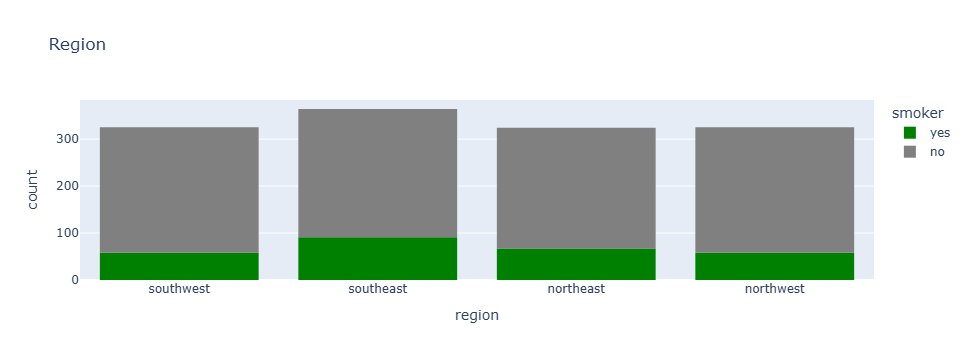

In [7]:
px.histogram(medical_df,
             x='region',
             color='smoker',
             color_discrete_sequence=['green', 'grey'],
             title='Region')

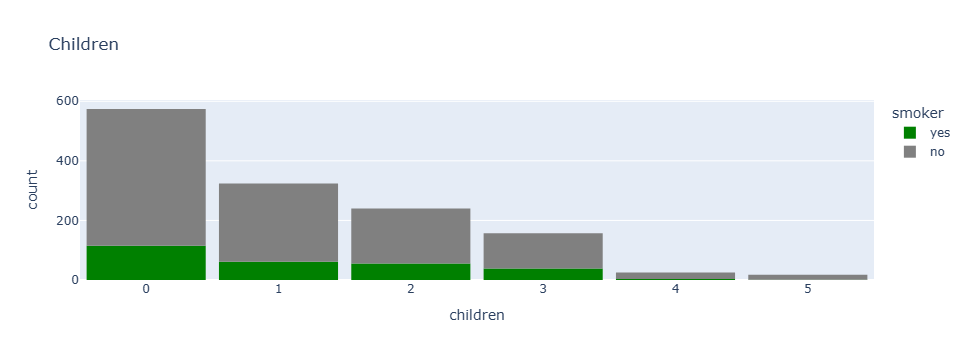

In [8]:
fig = px.histogram(medical_df,
             x='children',
             color='smoker',
             color_discrete_sequence=['green', 'grey'],
             title='Children')
fig.update_layout(bargap=0.1)
fig.show()

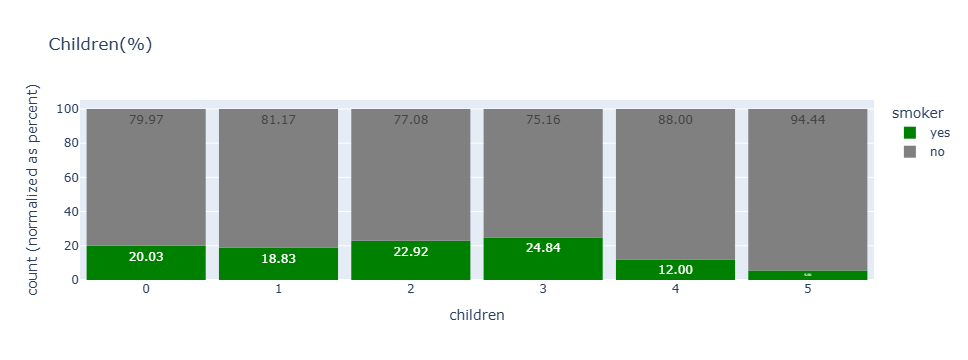

In [9]:
fig = px.histogram(medical_df,
             x='children',
             color='smoker',
             barnorm='percent',
             text_auto='.2f',
             color_discrete_sequence=['green', 'grey'],
             title='Children(%)')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
- Всі 4 регіони мають приблизно однакову частку курців та некурців. Тому приналежність до певного регіону, мабуть, не має великого впливу на формування charges.
- У регіоні southeast найбільша к-ть курців. Це насамперед зв'язано з великою концентрацією клієнтів в цьому регіоні. Тому середні страхові стягнення там будуть дещо вищими.
- Більшість клієнтів в нашій вибірці не мають дітей взагалі.
- Великі сім'ї не є основним сегментом, і ризики, пов'язані з великою кількістю утриманців, обмежені.
- Майже 25% клієнтів з 3 дітьми вказали що вони курять - це найбільше відсоткове значення серед даних по к-тю дітей.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

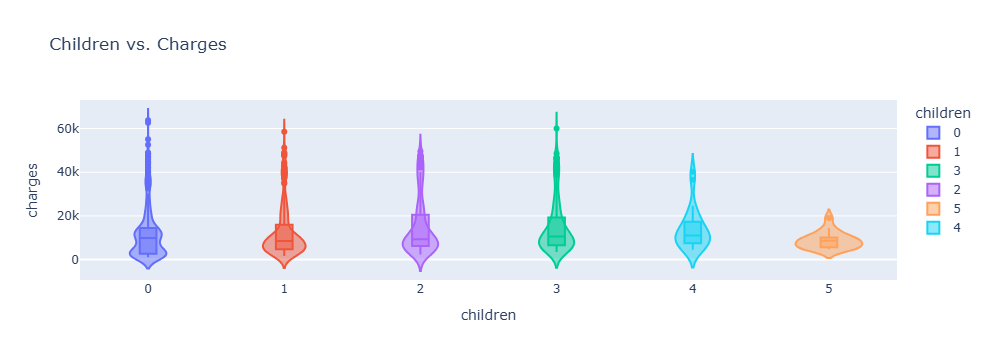

In [11]:
fig = px.violin(medical_df, y="charges", x="children", color="children", box=True, hover_data=medical_df.columns, title='Children vs. Charges')
fig.show()

**Спостереження**
- У всіх 6 групах середні медичні витрати знаходять на майже одному рівні (від 8.5К до 11K). Можна стверджувати про схожі розподіли.
- Про високі витрати - більші за 50К - можна говорити в контексті груп без дітей та сімей з 1-3 дітьми.
- Для найбільших сімей (4-5 дітей) фіксується падіння витрат.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [20]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [21]:
def estimate_charges(age, w, b):
    return w * age + b

In [22]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

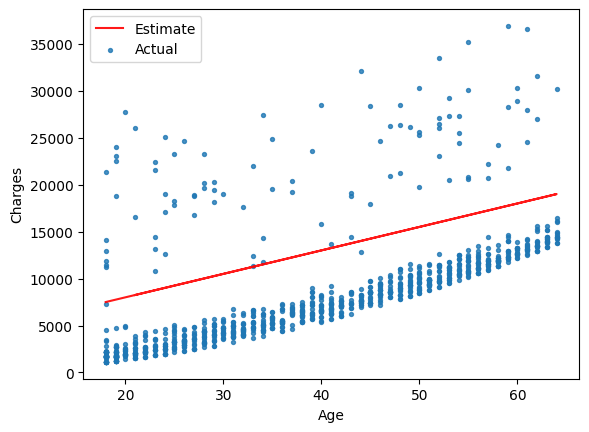

In [23]:
try_parameters(non_smoker_df, 250, 3000)

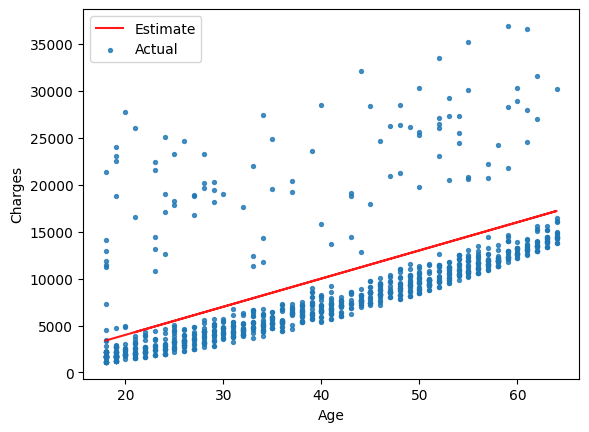

In [52]:
try_parameters(non_smoker_df, 300, -2000)

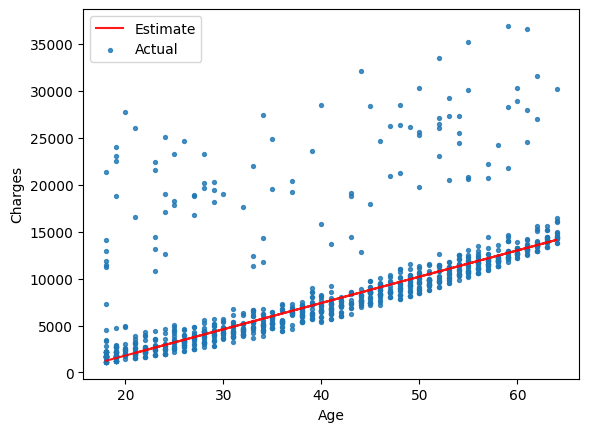

In [60]:
try_parameters(non_smoker_df, 280, -3800)

**Спостереження**
- Перебрала три такі пари параметрів: (250, 3000) (300, -2000) (280, -3800)
- Остання пара з трьох (280, -3800) найточніше наближається до точок та повторяє їх лінію.
- Коефіцієнт зміщення b у нашій моделі має мати від'ємне значення.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [44]:
import numpy as np

In [45]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [58]:
# Список пар (w, b)
parameters = [(250, 3000), (300, -2000), (280, -3800)]

targets = non_smoker_df.charges

for w, b in parameters:
    predicted = estimate_charges(non_smoker_df.age, w, b)
    error = rmse(targets, predicted)
    print(f"Для пари: w={w}, b={b}  RMSE = {error:.2f}")

Для пари: w=250, b=3000  RMSE = 6423.73
Для пари: w=300, b=-2000  RMSE = 4884.63
Для пари: w=280, b=-3800  RMSE = 4819.39


**Спостереження**
- Найменше значення loss зафіксовано для пари w=280, b=-3800.

Підбір значень можна продовжити робити вручну. Я б сфокусувалась спочатку на одному параметрі, підібрала б його і далі почала змінювати наступний.